In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [2]:
mat = scipy.io.loadmat('data/data.mat')
data = mat['data']
X = data[:, 0]
y = data[:, 1] 

### b

In [8]:
#function for local weighted linear reg
def linear_weighted_lr(x, X, y, bandwidth, reg=1e-5):
    m = X.shape[0]
    weights = np.exp(-((X-x)**2)/(2*bandwidth**2))
    W = np.diag(weights)

    Xb = np.column_stack((np.ones(m), X))
    xb = np.append(1, x)

    bandwidth = np.linalg.inv(Xb.T@W@Xb + reg*np.identity(Xb.shape[1]))@Xb.T@W@y

    return xb @ bandwidth

In [9]:
#function for cross validation
def linear_weight_cv(X, y, bandwidths):
    mse_vals = []
    
    for bandwidth in bandwidths:
        tot_mse = []
        
        for train_id, val_id in KFold(n_splits=5).split(X):
            X_train, X_val = X[train_id], X[val_id]
            y_train, y_val = y[train_id], y[val_id]
            
            predictions = []
            for x in X_val:
                predictions.append(linear_weighted_lr(x, X_train, y_train, bandwidth))
            
            mse = mean_squared_error(y_val, predictions)
            tot_mse.append(mse)
            
        mse_vals.append(np.mean(tot_mse))
    
    return bandwidths, mse_vals

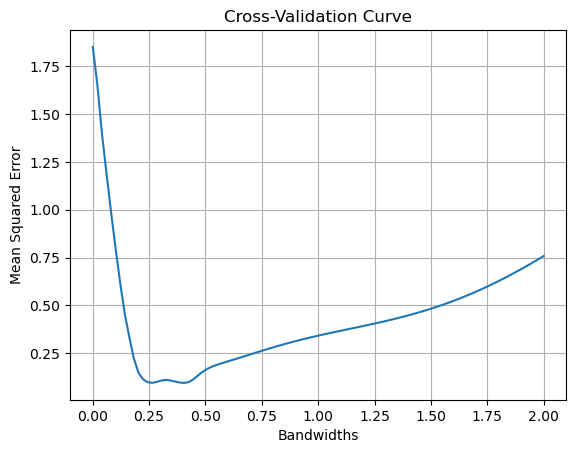

Lowest MSE: 0.09445696417250893
Optimal Bandwidth: 0.40483838383838383


In [10]:
bandwidths, mse_vals = linear_weight_cv(X, y, np.linspace(0.001, 2, 100))

# cv curve 
plt.plot(bandwidths, mse_vals)
plt.xlabel('Bandwidths')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Curve')
plt.grid(True)
plt.savefig('cv_curve.png')
plt.show()

# Find the index of the minimum MSE value
min_id = np.argmin(mse_vals)
opt_bandwidth = bandwidths[min_id]
opt_mse = mse_vals[min_id]

print("Lowest MSE:", opt_mse)
print("Optimal Bandwidth:", opt_bandwidth)

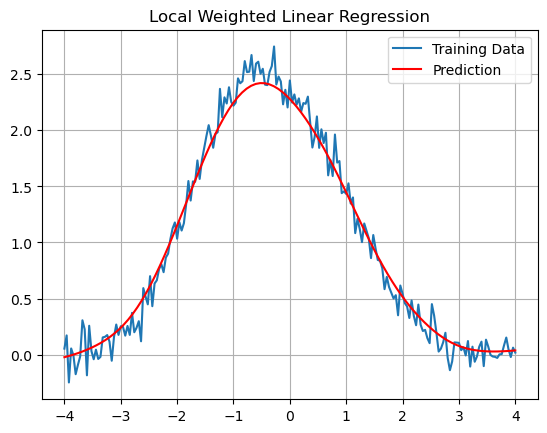

In [11]:
x_vals = np.linspace(np.min(X), np.max(X), 100)
predictions = []

for x in x_vals:
    predictions.append(linear_weighted_lr(x, X, y, opt_bandwidth))
    
# Plot training with prediction
plt.plot(X, y, label='Training Data')
plt.plot(x_vals, predictions, color='red', label='Prediction')
plt.title('Local Weighted Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig('weighted_lr.png')
plt.show()

### c

In [12]:
x = -1.5
prediction = linear_weighted_lr(x, X, y, opt_bandwidth)

print("Prediction for x = -1.5:", prediction)


Prediction for x = -1.5: 1.7706029486112946
